In [20]:
from cooking_bot.querries import query_recipies, ingredient_similarity_search, get_recipy_by_ingredients, get_most_similar_step
from cooking_bot.data_formats import *
import matplotlib.pyplot as plt

### Recipy Text Search

Took 0.54s
Mushroom Kale Stuffed Shells


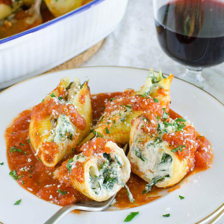

In [2]:
result : QueryResult = query_recipies("spinach kale mushroom", mode="text", enforce_images=True, verbosity=1)
print(result.hits[0].displayName)
result.hits[0].images[0].get_image().resize((224, 224))

### Recipy Sentence Transformer Search

Lasagna Roses


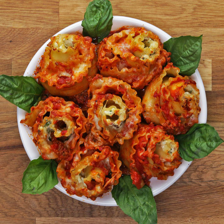

In [3]:
result : QueryResult = query_recipies("bolognese lasagna", mode="vec", min_cos_sim=0.2, enforce_images=True)
print(result.hits[0].displayName)
result.hits[0].images[0].get_image().resize((224, 224))

### Recipy Clip Search

Aunt Angie's Lasagna Recipe


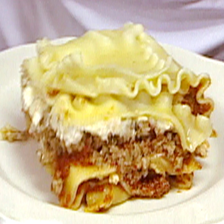

In [7]:
result : QueryResult = query_recipies("bolognese lasagna", mode="clip", min_cos_sim=0.2, enforce_images=True)
print(result.hits[0].displayName)
result.hits[0].images[0].get_image().resize((224, 224))

### Generalized Recipy Search

35
Self-Rising Flour the cooking time:  5 number of steps:  1


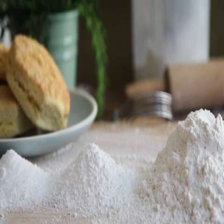

In [8]:
result : QueryResult = query_recipies(size=100, max_total_minutes=5, enforce_images=True, max_steps=5)
print(result.n_hits)

recipe : Recipe = result.hits[0]

print(recipe.displayName, "the cooking time: ", recipe.totalTimeMinutes, "number of steps: ", len(recipe.instructions))
recipe.images[0].get_image().resize((224, 224))

### Search Recipy by list of ingredients

Fire-Roasted Fieri Lasagna 170


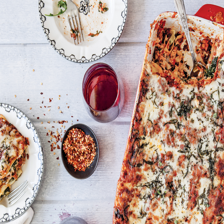

In [9]:
result : QueryResult = get_recipy_by_ingredients(["spinach","tomato", "egg plant"], max_total_minutes=200 ,enforce_images=True)
print(result.hits[0].displayName, result.hits[0].totalTimeMinutes)
result.hits[0].images[0].get_image().resize((224, 224))

In [10]:
res : List[Ingredient] = ingredient_similarity_search("fenchel")

[i.displayText for i in res]

['1.0 Fennel Bulb',
 '2 medium fennel bulbs, trimmed, reserve some fronds',
 '½ tsp Fennel Bulb',
 '1 teaspoon fennel, ground and toasted',
 '1.0 cup Fennel Bulb']

## Instruction Searches

Took 0.26s
Banana Bread


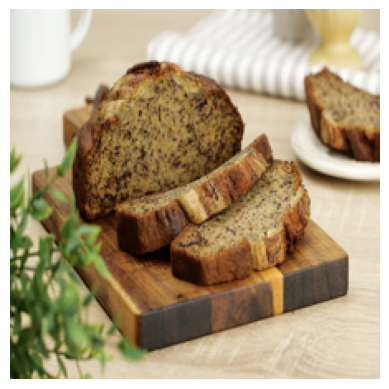


 Peel the Banana. Mash 2 1/2 bananas with a fork in a bowl and set the other half aside.


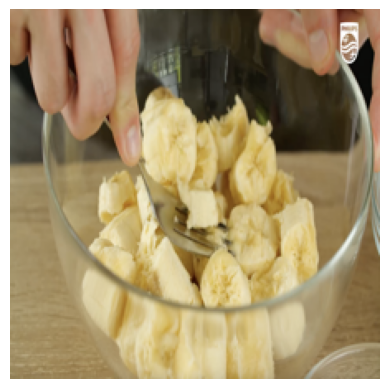


 Add Butter and Egg to mashed bananas and mix well together.


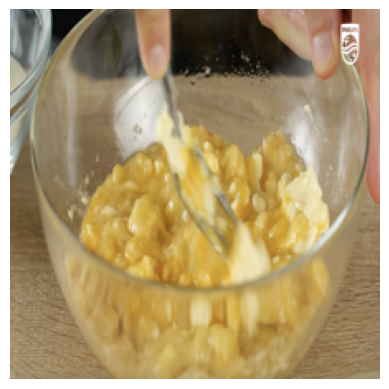


 In a separate bowl, mix the All-Purpose Flour, Granulated Sugar, Salt, and Baking Soda together.


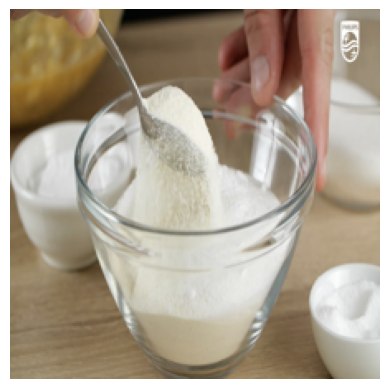


 Add the dry ingredients to the mashed banana mixture. Using a fork or spatula, mash all ingredients into a wet banana batter.


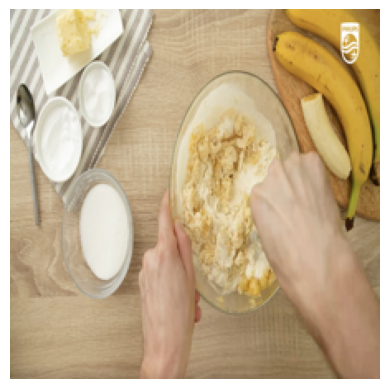


 Add Butter to the bottom and sides of the Philips baking accessory and then dust it with a bit of flour. Pour the banana bread batter into the baking accessory. Slice the leftover banana in half lengthwise and place both halves on top of the banana bread.


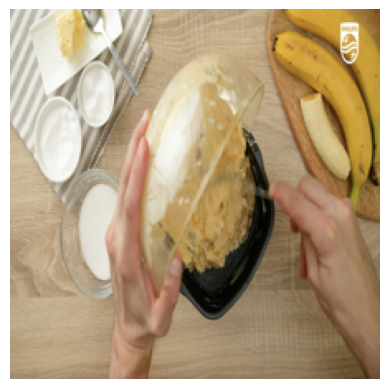


 Place the baking accessory in the basket. Put the basket into the Airfryer. Cook at 325 degrees F (160 degrees C) for 40 minutes.


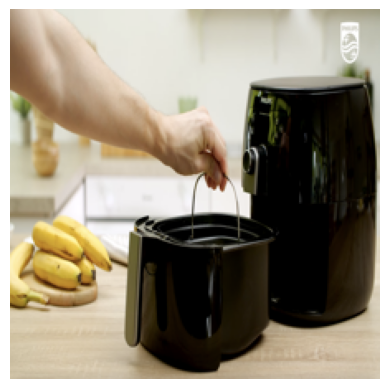


 Once finished, cover the banana bread with a kitchen towel to keep it moist.


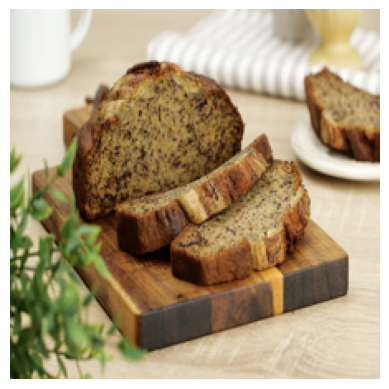


 Well done! Want to save this recipe to your SideChef cookbook or meal plan? Try “Alexa, send to phone”.


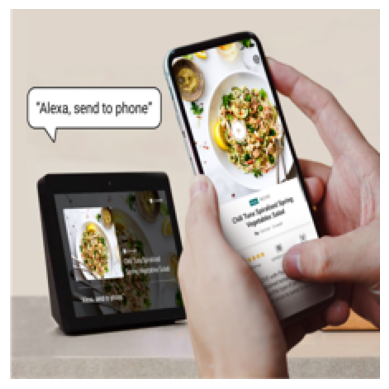

In [25]:
# example Recipy
result : QueryResult = query_recipies("Banana Bread", mode="text", enforce_images=True, verbosity=1)
recipe = result.hits[3]

print(recipe.displayName)
plt.imshow(recipe.images[0].get_image().resize((224, 224)))
plt.axis("off")
plt.show()

def show_step(step):
    print("\n", step.stepText)
    
    if step.stepImages:
        try:
            plt.imshow(step.stepImages[0].get_image().resize((224, 224)))
            plt.axis("off")
            plt.show()
        except Exception as e:
            print(e)
for step in recipe.instructions:
    show_step(step)
    
    


### By Clip


 In a separate bowl, mix the All-Purpose Flour, Granulated Sugar, Salt, and Baking Soda together.


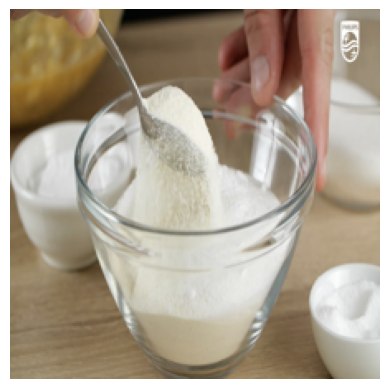

0.30989993066117016

In [29]:
step, score = get_most_similar_step(recipe, "The step where i mix the flour sugar and salt together",mode = "clip")
show_step(step)
score

### By Sentencebert


 In a separate bowl, mix the All-Purpose Flour, Granulated Sugar, Salt, and Baking Soda together.


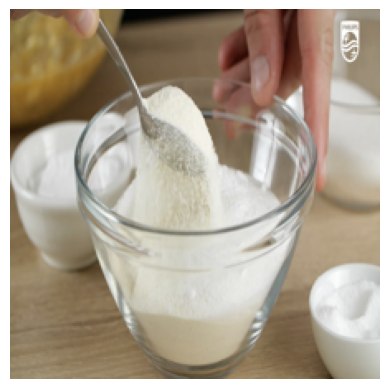

0.7141194210885875

In [28]:
step, score = get_most_similar_step(recipe, "The step where i mix the flour sugar and salt together",mode = "vec")
show_step(step)
score